## **<center><font style="color:rgb(100,109,254)">Digital Image Processing</font> </center>**
### **<center><font style="color:rgb(100,109,254)">Lab 05</font> </center>**

### **<center><font style="color:rgb(100,109,254)">Finding Length & Width of Object</font> </center>**

****

### **<font style="color:rgb(255,0,255)">01. What is cv2.minAreaRect(), and how it can used? </font>**

cv2.minAreaRect() is a function in the OpenCV (Open Computer Vision) library that can be used to find the minimum area rectangle that encloses a set of points. The function returns a rotated rectangle, which is defined by the center point, size, and orientation of the rectangle.


((55.0, 55.0), (90.0, 90.0), 90.0)
[[ 10.  10.]
 [100.  10.]
 [100. 100.]
 [ 10. 100.]]


C:\Users\hp\AppData\Local\Temp\ipykernel_17660\1726413003.py:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


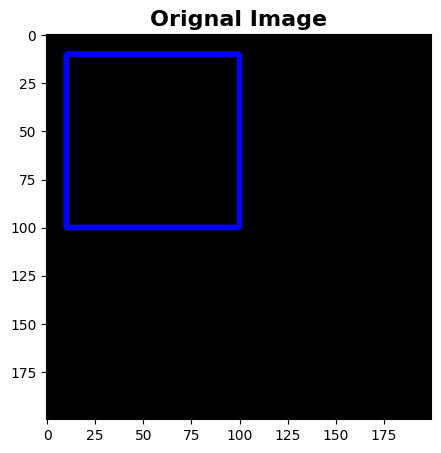

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a set of points
points = np.array([[10, 10], [100, 10], [100, 100], [10, 100]], np.int32)

# Find the minimum area rectangle that encloses the points
rect = cv2.minAreaRect(points)
print(rect)

# Extract the center, size, and orientation of the rectangle
(center_x, center_y), (width, height), angle = rect

# Draw the rectangle on an image
image = np.zeros((200, 200, 3), np.uint8)
box = cv2.boxPoints(rect)
print(box)
box = np.int0(box)
cv2.drawContours(image, [box], 0, (0, 0, 255), 2)

# Display the image
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.title("Orignal Image", fontsize = 16, fontweight = 'bold')

cv2.imshow('Image with rectangle', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In this example, points is a 2D NumPy array containing the coordinates of the points that define the region we want to enclose with a rectangle. The cv2.minAreaRect() function takes this array as an input and returns the minimum area rectangle that encloses the points.

The cv2.boxPoints() function is used to convert the rotated rectangle returned by cv2.minAreaRect() into a list of points that can be used to draw the rectangle on an image using cv2.drawContours().

### **<font style="color:rgb(255,0,255)">02. Make a Function to Detect Contours Using Binary Thresholding </font>**

In [4]:
import cv2 as cv

def detectUsingThresh(img, threshVal = 140):
        
        # convert to grayscale
        imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        # invert grascale
        invertGray = cv.bitwise_not(imgGray)
        
        # apply binary thresholding
        ret, binaryThresh = cv.threshold(invertGray, threshVal, 255, cv.THRESH_BINARY)

        # detect contours 
        contours, hierarchy = cv.findContours(binaryThresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

        objectContours = []

        # save the contours with area atleast greater than 2000 pixels (50x40 = 2000)
        for cont in contours:
            area = cv.contourArea(cont)

            if area > 2000:
                objectContours.append(cont)

        return objectContours

1


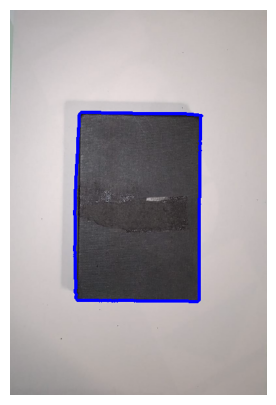

In [5]:
import matplotlib.pyplot as plt

img = cv.imread("1.jpeg")
img = cv.resize(img, (400, 600))


contours = detectUsingThresh(img)
print(len(contours))

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis(False)
# cv.imshow("image", img)
# cv.waitKey()

cv.destroyAllWindows()

### **<font style="color:rgb(255,0,255)">03. Make a Function to Detect Contours Using Canny filter </font>**

In [6]:
import cv2 as cv
import numpy as np

def detectUsingCanny(img, lower= 120,upper= 160):
        
        # Blur the image to remove noise
        blurred_image = cv.GaussianBlur(img,(5,5),0)

        # Apply canny edge detection
        cannyImge = cv.Canny(blurred_image, lower, upper)
        
        # kernel for image dilation
        dilateKernel = np.ones((5,5), "uint8")

        # image dilation to enhance the edges
        imgDilation = cv.dilate(cannyImge, dilateKernel, iterations=1)
        
        contours, hierarchy = cv.findContours(imgDilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

        cv.imshow("dilat", imgDilation)

        objectContours = []

        for cont in contours:
            area = cv.contourArea(cont)

            if area > 2000:
                objectContours.append(cont)

        return objectContours

1


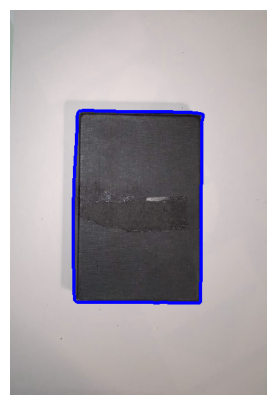

In [7]:
import matplotlib.pyplot as plt

img = cv.imread("1.jpeg")
img = cv.resize(img, (400, 600))


contours = detectUsingCanny(img)
print(len(contours))

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis(False)
# cv.imshow("image", img)
# cv.waitKey()

cv.destroyAllWindows()

### **<center><font style="color:rgb(255,0,0)">Which one is better Binary Thresholding or Canny filter!</font></center>**

Both binary thresholding and the Canny edge filter are commonly used techniques for detecting edges and contours in images. The choice of which method to use depends on the specific requirements of your application.

Binary thresholding is a simple and fast method for separating objects in an image from the background. It works by thresholding an image so that pixels with values above a certain threshold are set to one value (usually white), and pixels with values below the threshold are set to another value (usually black). This results in a binary image with white pixels representing object pixels and black pixels representing background pixels. Binary thresholding is suitable for images with clear and distinct object boundaries.

The Canny edge filter is a more sophisticated method for detecting edges and contours in images. It uses a multi-stage algorithm to detect edges that are more likely to correspond to object boundaries. The Canny edge filter works by first smoothing the image using a Gaussian filter to reduce noise, then finding the gradient intensity and direction of the image using the Sobel operator. It then applies non-maximum suppression to thin the edges and removes false edges caused by noise. Finally, it applies hysteresis thresholding to suppress weak edges and retain only strong edges. The Canny edge filter is more robust than binary thresholding and can handle images with more complex and varied edge features. However, it is also slower and more computationally intensive.

In general, the Canny edge filter is a better choice for contour detection in images with complex edge features or low contrast, while binary thresholding is a good choice for images with clear and distinct object boundaries. Ultimately, the best method for contour detection will depend on the characteristics of the images you are working with and the specific requirements of your application.

### **<font style="color:rgb(255,0,255)">04. Now make class with name MyDetectionMethods and include the above created function in it </font>**

In [15]:
import cv2 as cv
import numpy as np

class MyDetectionMethods():
    # def __init__(self):
    #     pass

    def detectUsingThresh(img, threshVal = 140):
        
        # convert to grayscale
        imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        # invert grascale
        invertGray = cv.bitwise_not(imgGray)
        
        # apply binary thresholding
        ret, binaryThresh = cv.threshold(invertGray, threshVal, 255, cv.THRESH_BINARY)

        # detect contours 
        contours, hierarchy = cv.findContours(binaryThresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

        objectContours = []

        # save the contours with area atleast greater than 2000 pixels (50x40 = 2000)
        for cont in contours:
            area = cv.contourArea(cont)

            if area > 2000:
                objectContours.append(cont)
        return objectContours

    def detectUsingCanny(img, lower= 120,upper= 160):
        
        # Blur the image to remove noise
        blurred_image = cv.GaussianBlur(img,(9,9),0)

        # Apply canny edge detection
        cannyImge = cv.Canny(blurred_image, lower, upper)
        
        # kernel for image dilation
        dilateKernel = np.ones((5,5), "uint8")

        # image dilation to enhance the edges
        imgDilation = cv.dilate(cannyImge, dilateKernel, iterations=1)
        
        contours, hierarchy = cv.findContours(imgDilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

        # cv.imshow("dilat", imgDilation)

        objectContours = []

        for cont in contours:
            area = cv.contourArea(cont)

            if area > 2000:
                objectContours.append(cont)

        return objectContours

1


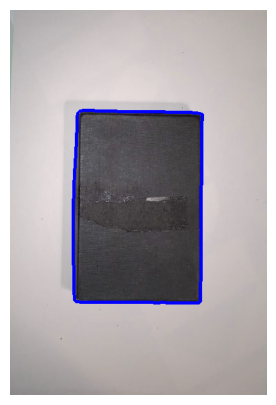

In [16]:
import matplotlib.pyplot as plt

# make object of above created class
detector = MyDetectionMethods

img = cv.imread("1.jpeg")
img = cv.resize(img, (400, 600))

# now call the above function from class using object detector
contours = detector.detectUsingCanny(img=img, lower=120, upper=160)
print(len(contours))

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis(False)
# cv.imshow("image", img)
cv.waitKey()

cv.destroyAllWindows()


### **<font style="color:rgb(255,0,255)">05. Aruco Library of OpenCV </font>**

The Aruco library is a part of the open source computer vision library OpenCV (OpenCV stands for Open Source Computer Vision). It is a collection of tools and functions for detecting and identifying augmented reality (AR) markers in images and video streams. AR markers are small, square-shaped black and white patterns that are used to represent virtual objects in the real world.

The Aruco library provides a set of functions for detecting and identifying AR markers in images. It can detect markers of different sizes and types, and it can also estimate the pose (position and orientation) of the markers in the image. This information can be used to overlay virtual objects on top of the markers in real-time, creating the illusion of augmented reality.

To use the Aruco library in your Python code, you will need to install the OpenCV library and import the cv2.aruco module. Here is an example of how you can use the Aruco library to detect and identify AR markers in an image:

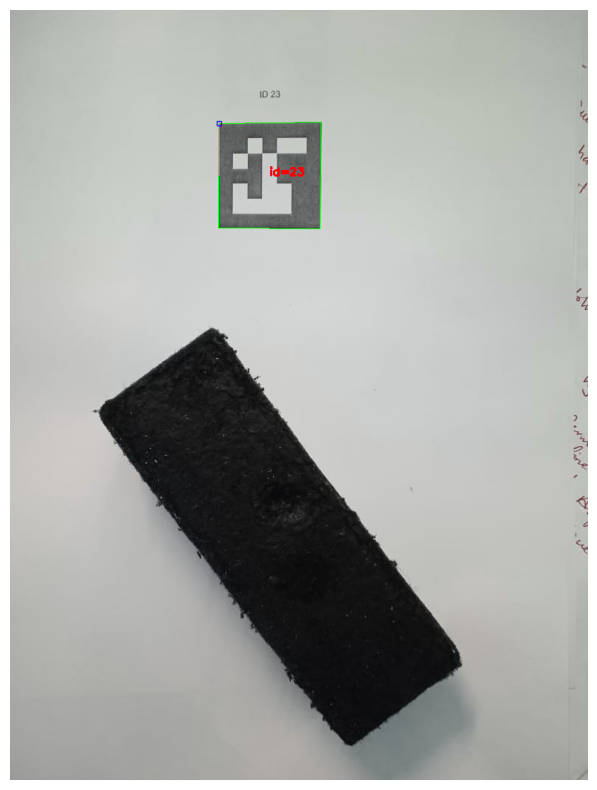

In [23]:
import cv2

# Load the image
image = cv2.imread("111.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a dictionary of AR markers
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)

# Detect the markers in the image
corners, ids, _ = cv2.aruco.detectMarkers(gray, dictionary)

# If markers were detected, draw them on the image
if ids is not None:
    image = cv2.aruco.drawDetectedMarkers(image, corners, ids)

# Show the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis(False)

cv2.imshow("Image", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

### **<font style="color:rgb(255,0,255)">06. Detect and draw AR markers in video or webcam </font>**

In [25]:
import cv2

# capture webcam
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()

    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Create a dictionary of AR markers
    dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)

    # Detect the markers in the image
    corners, ids, _ = cv2.aruco.detectMarkers(gray, dictionary)

    # If markers were detected, draw them on the image
    if ids is not None:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)

    # Show the image
    cv2.imshow("Image", frame)
    k = cv2.waitKey(1)

    if k == ord("q"):
        cap.release()
        cv2.destroyAllWindows()
        break

cv2.destroyAllWindows()

In [13]:
cap.release()
cv2.destroyAllWindows()

This code will detect and draw the boundaries of any AR markers present in the image. You can then use the ids and corners variables to identify the markers and estimate their pose.

The Aruco library is a powerful tool for creating augmented reality applications. It is widely used in a variety of fields, including robotics, industrial automation, and entertainment.

### **<font style="color:rgb(255,0,255)">07. cv.aruco.DetectorParameters_create() </font>**

cv2.aruco.DetectorParameters_create() is a function in the OpenCV Aruco library that creates and returns a cv2.aruco.DetectorParameters object. '

The cv2.aruco.DetectorParameters object is used to specify various parameters for the Aruco marker detector. These parameters can be used to fine-tune the behavior of the detector and improve its performance for a specific application.

Here is an example of how cv2.aruco.DetectorParameters_create() can be used in Python:

In [26]:
import cv2

# Create a DetectorParameters object with default values
params = cv2.aruco.DetectorParameters_create()

# Set the corner refinement method to "subpix"
params.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX

# Use adaptive thresholding to detect markers
params.adaptiveThreshConstant = 10

AttributeError: module 'cv2.aruco' has no attribute 'DetectorParameters_create'

This code creates a cv2.aruco.DetectorParameters object with default values and then modifies some of the parameters to customize the behavior of the detector. The maxErr parameter specifies the maximum allowable error in pixels between the detected corners and the true corners of the markers. The cornerRefinementMethod parameter specifies the method to use for refining the corners of the markers. The adaptiveThreshConstant parameter specifies the constant to use for adaptive thresholding, which is a method for detecting markers in images with varying illumination.

The cv2.aruco.DetectorParameters object can then be passed to the cv2.aruco.detectMarkers() function as an argument to specify the parameters to use for marker detection:

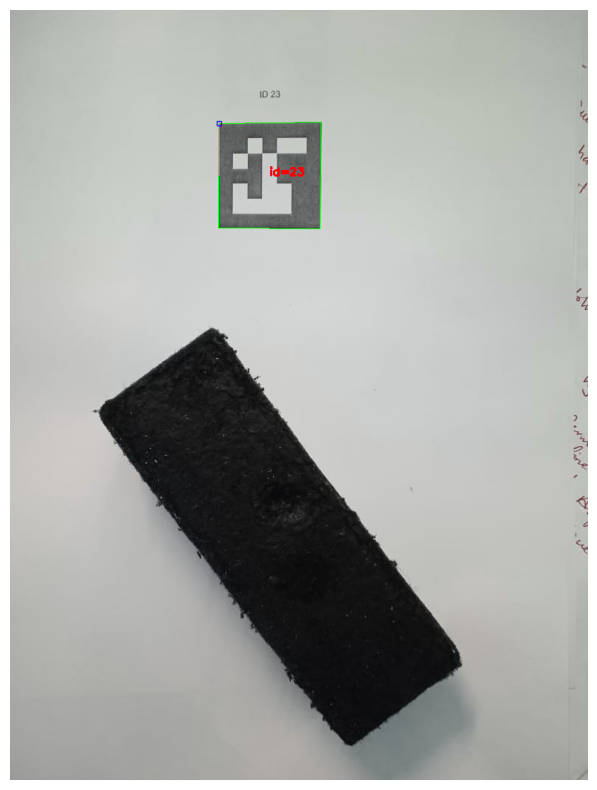

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("111.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a dictionary of AR markers
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)

# Detect the markers in the image using the specified parameters
corners, ids, _ = cv2.aruco.detectMarkers(gray, dictionary)

# If markers were detected, draw them on the image
if ids is not None:
    image = cv2.aruco.drawDetectedMarkers(image, corners, ids)

# Show the image
# Show the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis(False)

cv2.imshow("Image", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

This code will use the parameters specified in the params object to detect AR markers in the image. The cv2.aruco.DetectorParameters object can be used to fine-tune the behavior of the marker detector and improve its performance for a specific application.

### **<font style="color:rgb(255,0,255)">08. cv.aruco.Dictionary_get(cv.aruco.DICT_5X5_50) </font>**

cv2.aruco.Dictionary_get(cv.aruco.DICT_5X5_50) is a function in the OpenCV Aruco library that returns a predefined dictionary of AR markers (augmented reality markers). The cv2.aruco.Dictionary_get() function takes a single argument, which specifies the type of dictionary to return. In this case, the argument cv.aruco.DICT_5X5_50 specifies that the function should return a dictionary of 50 unique 5x5 AR markers.

A dictionary of AR markers is a collection of unique markers that can be used to represent virtual objects in the real world. Each marker in the dictionary is a black and white pattern that can be detected and identified by a computer vision system. The Aruco library provides several predefined dictionaries of markers, each of which is optimized for different applications.

Here is an example of how the cv2.aruco.Dictionary_get() function can be used in Python:

In [10]:
import cv2

# Create a dictionary of AR markers
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)

# Generate a marker with id 0 from the dictionary
marker = cv2.aruco.drawMarker(dictionary, 0, 100)

# Show the marker
plt.figure(figsize=(4,4))
plt.imshow(marker, cmap='gray')
plt.axis(False)
cv2.imshow("Marker", marker)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2.aruco' has no attribute 'drawMarker'

This code creates a dictionary of 50 unique 5x5 AR markers and generates a marker with id 0 from the dictionary. The marker is then displayed on the screen. You can use the cv2.aruco.drawMarker() function to generate markers with different sizes and IDs from the dictionary.

The cv2.aruco.Dictionary_get() function is commonly used in conjunction with the cv2.aruco.detectMarkers() function to detect and identify AR markers in images and video streams. The cv2.aruco.detectMarkers() function takes a dictionary of markers as an argument and uses it to identify the markers in the image.

### **<center><font style="color:rgb(255,0,0)">Now Let's build the project to calculate the width and height of an object!</font></center>**

In [11]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [17]:
detector = MyDetectionMethods #make an object of MyDetectionMethods class created above

(-0.5, 779.5, 1039.5, -0.5)

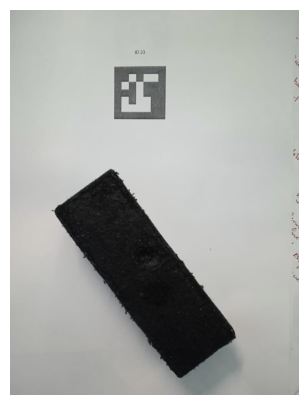

In [18]:
# read image and display

image = cv2.imread("111.jpeg")

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis(False)

In [19]:
# Now find contours by using the obect created above detector

contours = detector.detectUsingCanny(image)
print(len(contours))

2


(-0.5, 779.5, 1039.5, -0.5)

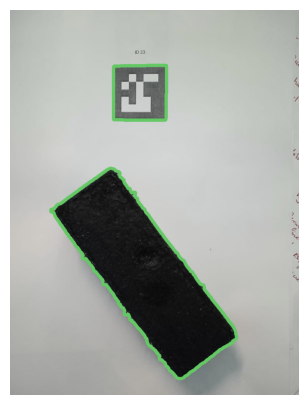

In [20]:
# Draw the contours

cv2.drawContours(image, contours, -1, (100,200,100), 7)

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis(False)

(-0.5, 779.5, 1039.5, -0.5)

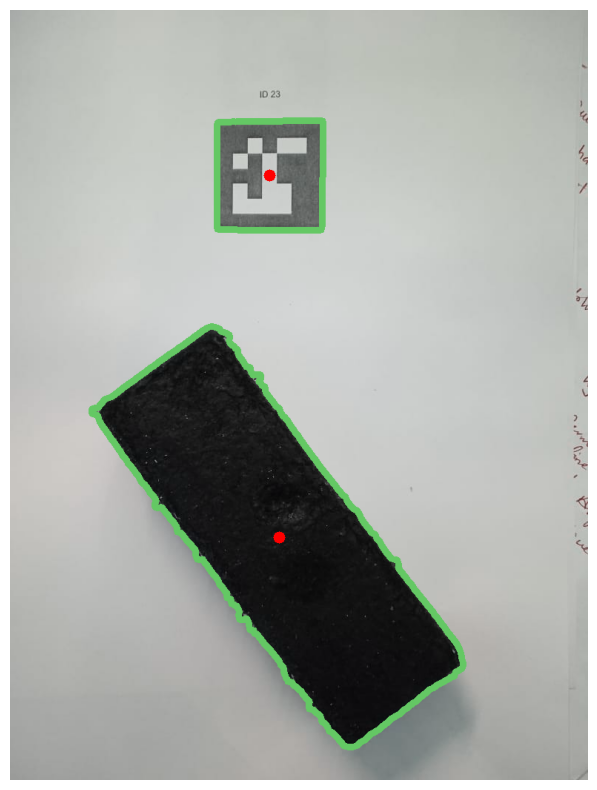

In [21]:
# Now find out the center of contours and draw the circle

for cont in contours:

    (centerX, centerY), (w, h), angle = cv2.minAreaRect(cont)

    cv.circle(image, (int(centerX),int(centerY)),8, (255,0,0),-1)


plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis(False)


[[ 101  544]
 [ 279  412]
 [ 624  881]
 [ 446 1012]]
[[279 149]
 [422 149]
 [422 297]
 [279 297]]


C:\Users\hp\AppData\Local\Temp\ipykernel_432\3157936595.py:15: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  boundingBox = np.int0(boundingBox)


(-0.5, 779.5, 1039.5, -0.5)

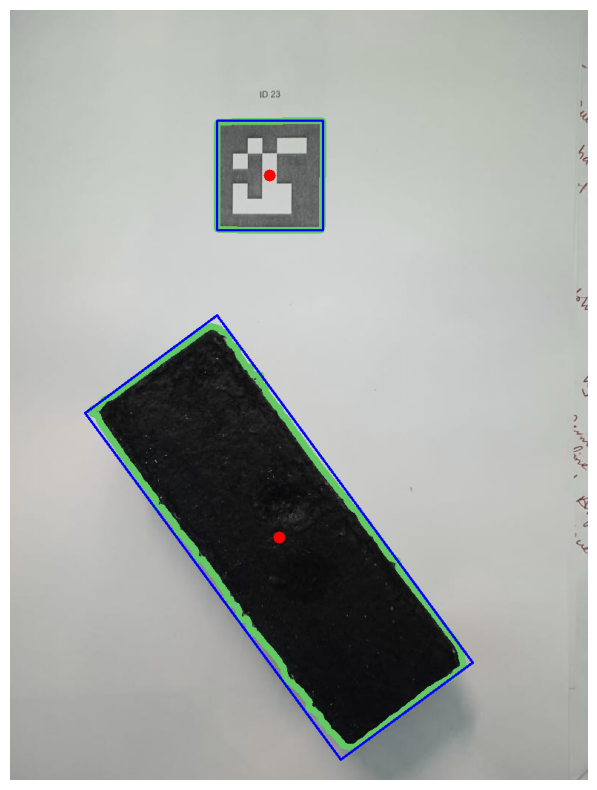

In [22]:
# The border line is not look good so in order to draw perfect line you have to do this

for cont in contours:

    
    result = cv2.minAreaRect(cont)

    (centerX, centerY), (w, h), angle = result

    cv.circle(image, (int(centerX),int(centerY)),8, (255,0,0),-1)

    # opposite of minAreaRect()
    boundingBox = cv.boxPoints(result)
    # #convert to integer
    boundingBox = np.int0(boundingBox)
    print(boundingBox)

     # # draw rectangle
    cv.line(image, (boundingBox[0][0], boundingBox[0][1]), (boundingBox[1][0],boundingBox[1][1]), (0,0,255),2)
    cv.line(image, (boundingBox[0][0], boundingBox[0][1]), (boundingBox[3][0],boundingBox[3][1]), (0,0,255),2)
    cv.line(image, (boundingBox[1][0],boundingBox[1][1]), (boundingBox[2][0],boundingBox[2][1]), (0,0,255),2)
    cv.line(image, (boundingBox[3][0],boundingBox[3][1]), (boundingBox[2][0],boundingBox[2][1]), (0,0,255),2)
    #




plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis(False)

[[ 101  544]
 [ 279  412]
 [ 624  881]
 [ 446 1012]]
[[279 149]
 [422 149]
 [422 297]
 [279 297]]


C:\Users\hp\AppData\Local\Temp\ipykernel_17660\3107587180.py:15: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  boundingBox = np.int0(boundingBox)


(-0.5, 779.5, 1039.5, -0.5)

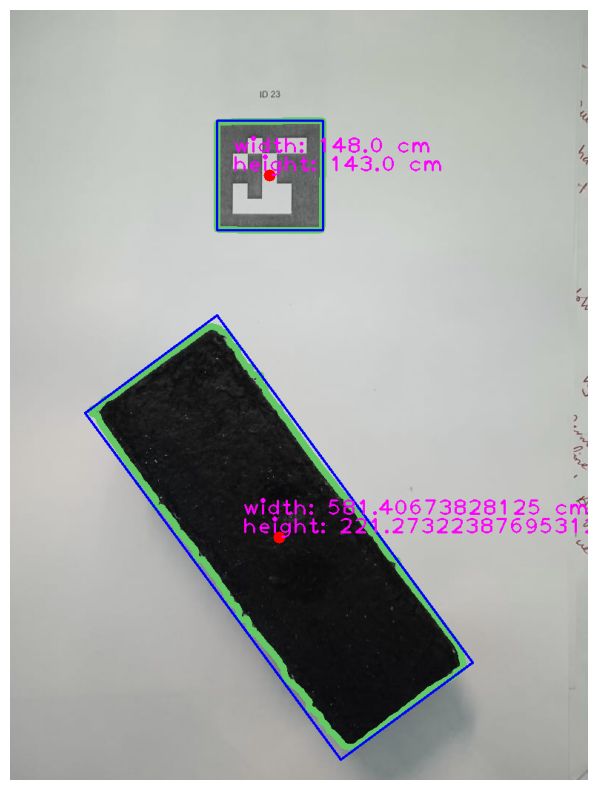

In [22]:
# Draw the width and height of each contour or object

for cont in contours:

    
    result = cv2.minAreaRect(cont)

    (centerX, centerY), (w, h), angle = result

    cv.circle(image, (int(centerX),int(centerY)),8, (255,0,0),-1)

    # opposite of minAreaRect()
    boundingBox = cv.boxPoints(result)
    # #convert to integer
    boundingBox = np.int0(boundingBox)
    print(boundingBox)

     # # draw rectangle
    cv.line(image, (boundingBox[0][0], boundingBox[0][1]), (boundingBox[1][0],boundingBox[1][1]), (0,0,255),2)
    cv.line(image, (boundingBox[0][0], boundingBox[0][1]), (boundingBox[3][0],boundingBox[3][1]), (0,0,255),2)
    cv.line(image, (boundingBox[1][0],boundingBox[1][1]), (boundingBox[2][0],boundingBox[2][1]), (0,0,255),2)
    cv.line(image, (boundingBox[3][0],boundingBox[3][1]), (boundingBox[2][0],boundingBox[2][1]), (0,0,255),2)
    #

    # # print height and width
    cv.putText(image, f'width: {w} cm', (int(centerX-50),int(centerY-30)),
                cv.FONT_HERSHEY_PLAIN, 2, (255,0,255), 2)
    cv.putText(image, f'height: {h} cm', (int(centerX-50),int(centerY-5)),
                cv.FONT_HERSHEY_PLAIN, 2, (255,0,255), 2)


plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis(False)

In [27]:
# ditect aruco
aruco_dict = cv.aruco.getPredefinedDictionary(cv.aruco.DICT_5X5_50)

img = cv.imread("111.jpeg")

# get aruco markers
corners, _, _ = cv.aruco.detectMarkers(img, aruco_dict)

corners = np.int0(corners)
cv.polylines(img, corners, True, (0,255,0), 3)

#  Aruco perimeter
perimeter = cv.arcLength(corners[0], True)
pixelCmRatio = perimeter/16.55
print(pixelCmRatio)

33.77796184620468


C:\Users\hp\AppData\Local\Temp\ipykernel_432\2008167297.py:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


[[ 101  544]
 [ 279  412]
 [ 624  881]
 [ 446 1012]]
[[279 149]
 [422 149]
 [422 297]
 [279 297]]


C:\Users\hp\AppData\Local\Temp\ipykernel_432\476876376.py:18: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  boundingBox = np.int0(boundingBox)


(-0.5, 779.5, 1039.5, -0.5)

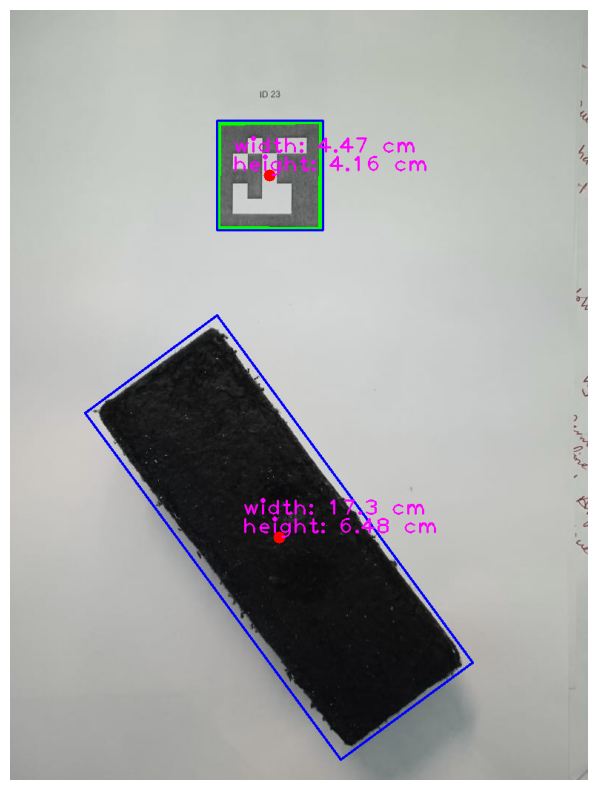

In [29]:
# Draw the width and height of each contour or object

for cont in contours:

    
    result = cv2.minAreaRect(cont)

    (centerX, centerY), (w, h), angle = result

    objectWidth = w / pixelCmRatio
    objectHeight = h / pixelCmRatio

    cv.circle(img, (int(centerX),int(centerY)),8, (255,0,0),-1)

    # opposite of minAreaRect()
    boundingBox = cv.boxPoints(result)
    # #convert to integer
    boundingBox = np.int0(boundingBox)
    print(boundingBox)

     # # draw rectangle
    cv.line(img, (boundingBox[0][0], boundingBox[0][1]), (boundingBox[1][0],boundingBox[1][1]), (0,0,255),2)
    cv.line(img, (boundingBox[0][0], boundingBox[0][1]), (boundingBox[3][0],boundingBox[3][1]), (0,0,255),2)
    cv.line(img, (boundingBox[1][0],boundingBox[1][1]), (boundingBox[2][0],boundingBox[2][1]), (0,0,255),2)
    cv.line(img, (boundingBox[3][0],boundingBox[3][1]), (boundingBox[2][0],boundingBox[2][1]), (0,0,255),2)
    #

    # # print height and width
    cv.putText(img, f'width: {round(objectWidth+0.09, 2)} cm', (int(centerX-50),int(centerY-30)),
                cv.FONT_HERSHEY_PLAIN, 2, (255,0,255), 2)
    cv.putText(img, f'height: {round(objectHeight-0.07, 2)} cm', (int(centerX-50),int(centerY-5)),
                cv.FONT_HERSHEY_PLAIN, 2, (255,0,255), 2)


plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)

But this width and height is not in cm it is in pixels, so we need to know how many pixels are in 1 cm

*************